### Ex. №1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
sns.set()

In [3]:
data = pd.read_csv("wines_properties.csv")

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
X = data.drop("Customer_Segment", axis = 1)

In [6]:
X_s = StandardScaler().fit_transform(X)

In [7]:
pca = PCA(n_components = 2).fit(X_s)

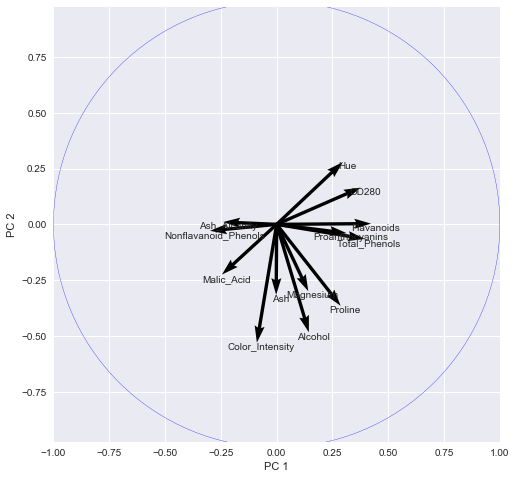

In [8]:
PCs = pca.components_

fig = plt.figure(figsize=(8,8))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

feature_names = list(X)
for i,j,z in zip(PCs[1,:]-0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

### Ex. №2

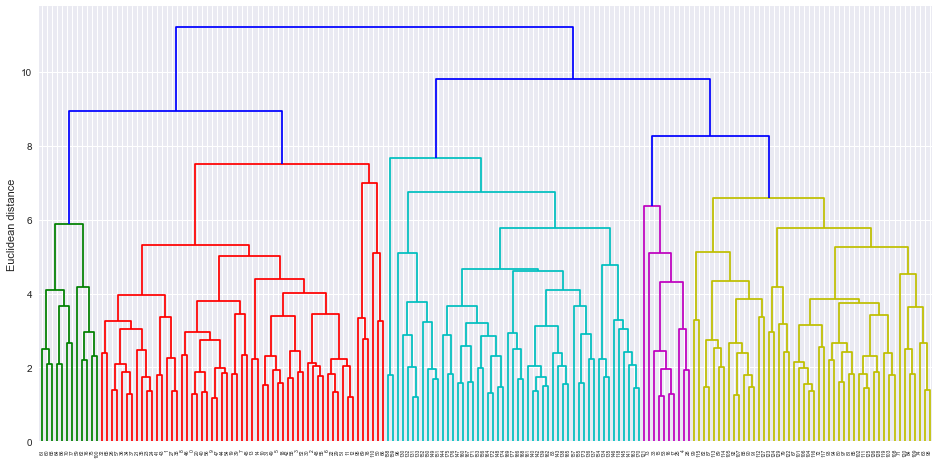

In [9]:
row_clusters = linkage(X_s, method='complete', metric='euclidean') #chose complete method in order to include all of the observations
fig = plt.figure(figsize=(16,8))
row_dendr = dendrogram(row_clusters)
plt.ylabel('Euclidean distance')

plt.show()

It seems like the most appropriate number of clusters is 3. We can also underpin it with elbow graph:

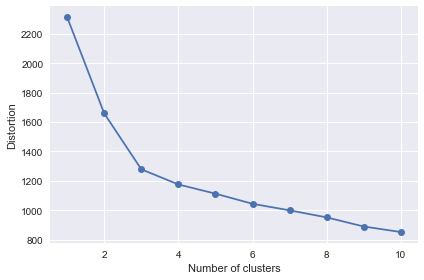

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_s)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### Ex. №3

In [15]:
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_s)

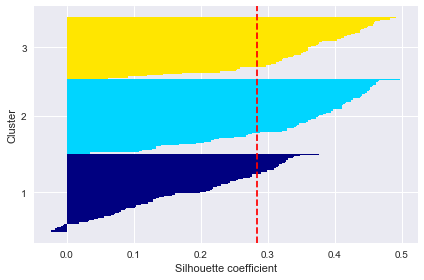

In [54]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(X_s, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

From this plot we can see that clusters do not have absolutely same sizes, but observations are divided quite well: there is a good cohesion in each cluster and enough distance between separated clusters.

In [13]:
# projection of the data into the first 2 PCs
X2 = PCA(n_components = 2).fit_transform(X_s)

In [14]:
for i in range(3): #due to we have chosen K=3
    m = []
    row_dist = pd.DataFrame(squareform(pdist(X[y_km == i], metric='euclidean')))
    print('Medoid of cluster  №%d' %i, 'is %d' %np.argmin(row_dist.sum(axis=0)), 'th observation in X_s')
    

NameError: name 'y_km' is not defined

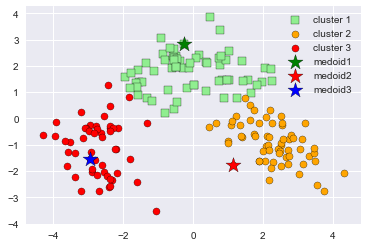

In [11]:
# cluster 1
plt.scatter(X2[y_km == 0, 0],
            X2[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
# cluster 2
plt.scatter(X2[y_km == 1, 0],
            X2[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
# cluster 3
plt.scatter(X2[y_km == 2, 0],
            X2[y_km == 2, 1],
            s=50, c='red',
            marker='o', edgecolor='black',
            label='cluster 3')

# medoid1
plt.scatter(X2[y_km == 0, 0][53],
            X2[y_km == 0, 1][53],
            s=250, marker='*',
            c='green', edgecolor='black',
            label='medoid1')
# medoid2
plt.scatter(X2[y_km == 1, 0][45],
            X2[y_km == 1, 1][45],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='medoid2')
# medoid3
plt.scatter(X2[y_km == 2, 0][37],
            X2[y_km == 2, 1][37],
            s=250, marker='*',
            c='blue', edgecolor='black',
            label='medoid3')
plt.legend(scatterpoints=1)

plt.show()

Clusters 2 and 3 are located in almost the same coordinates of the second principal component, while cluster 1 takes a higher position. When it comes to the coordinates of the first principal component, all three clusters differ significantly. 

Using the information from the circle of correlations, we can suggest that the first cluster is associated with lower values of Color intensity, Alcohol, Ash and Magnesium than the other two clusters. The observations in cluster 1 also tend to have lower values of Proline than the observations in cluster 2 have, and higher values of Hue and lower values of Malic acid than the observations in cluster 3 have. 

We can also suggest that in relation to Flavanoids, Total Phenols, OD280 and Proanthocyanins the observations in cluster 2 have the highest values, the observations in cluster 3 have the lowest values, while the observations in cluster 1 have medium values. This relationship is opposite for Nonflavanoid Phenols.

### Ex. №4

In [59]:
def bestK(X):
    scores = []
    for i in range(2,len(X)):
        km = KMeans(n_clusters=i, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
        y_km = km.fit_predict(X)
        scores.append(silhouette_score(X,y_km))
    m = np.argmax(scores)+2
    km = KMeans(n_clusters = m, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
    y_km = km.fit_predict(X)
    print('The number of K, that is associated with the best overall silhouette = '+str(m))  
    X2 = PCA(n_components = 2).fit_transform(X)
    for i in range(m):
        plt.scatter(X2[y_km == i, 0],
            X2[y_km == i, 1],
            s=50,
            marker='s', edgecolor='black',
            label='cluster 1')
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
    plt.show()

The number of K, that is associated with the best overall silhouette = 3


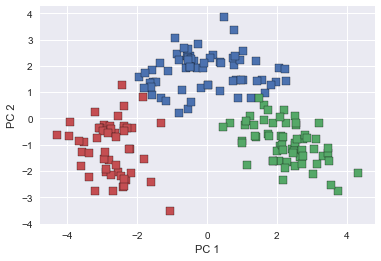

In [60]:
bestK(X_s)

### Ex. №5

In [49]:
def circle_of_correlations(X):

    X_s = StandardScaler().fit_transform(X)
    PCs = PCA().fit(X_s).components_
    for i in range(len(PCs) - 1):
        for j in range(i + 1, len(PCs)):
            fig = plt.figure(figsize=(6,6))
            plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
                       PCs[i,:], PCs[j,:], 
                       angles='xy', scale_units='xy', scale=1)

            feature_names = list(X)
            for k,l,m in zip(PCs[j,:]-0.02, PCs[i,:]+0.02, feature_names):
                plt.text(l, k, m, ha='center', va='center')

            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            plt.axis('equal')
            plt.xlim([-1.0,1.0])
            plt.ylim([-1.0,1.0])

            plt.xlabel('PC {}'.format(i + 1))
            plt.ylabel('PC {}'.format(j + 1))

            plt.show()

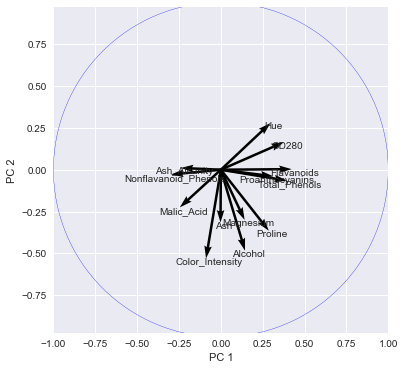

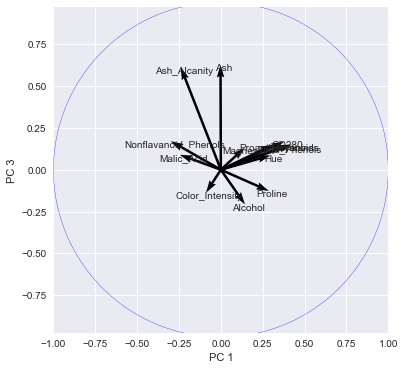

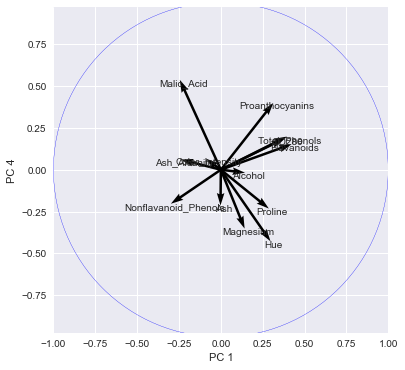

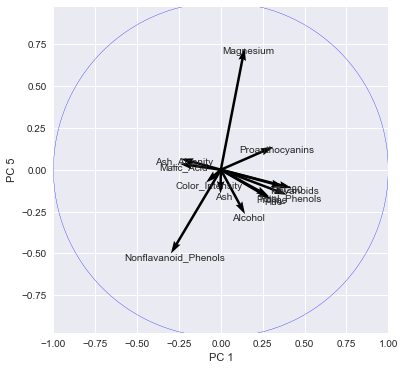

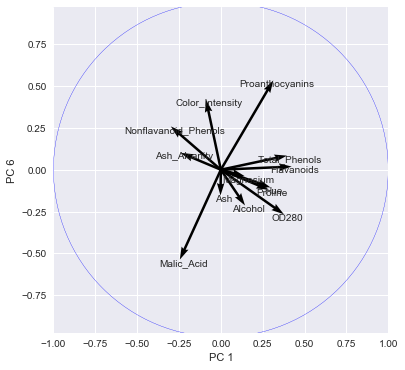

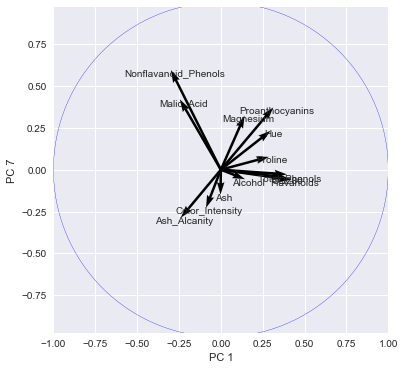

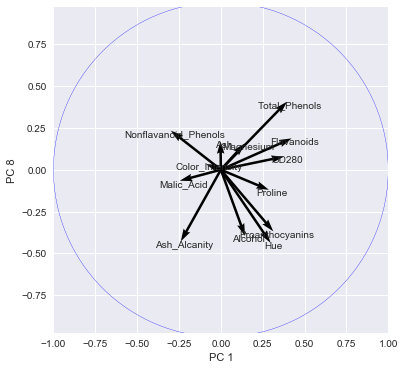

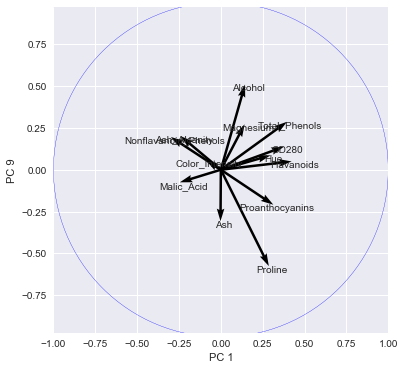

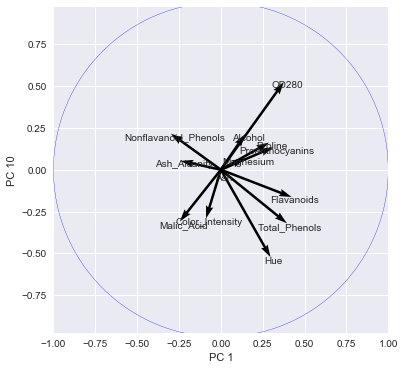

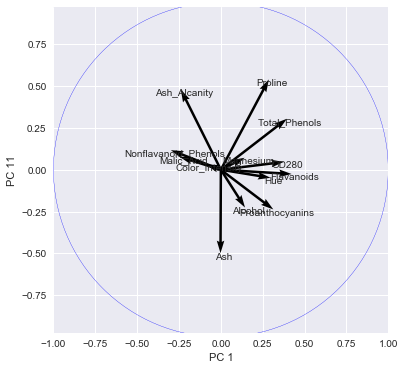

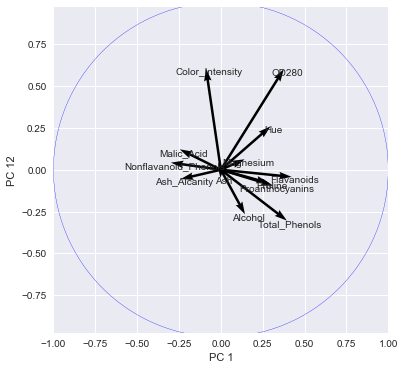

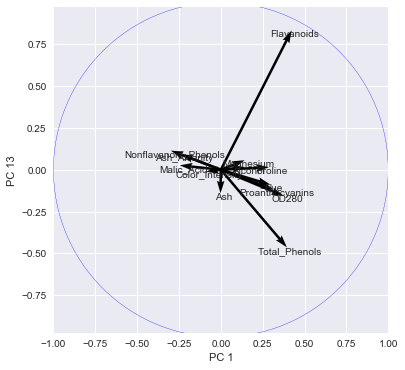

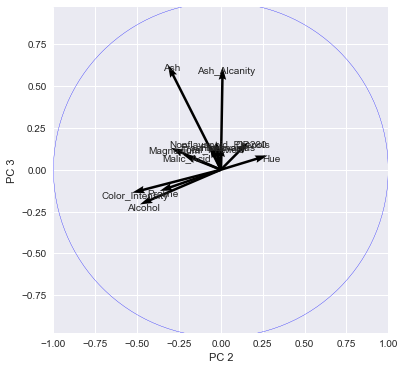

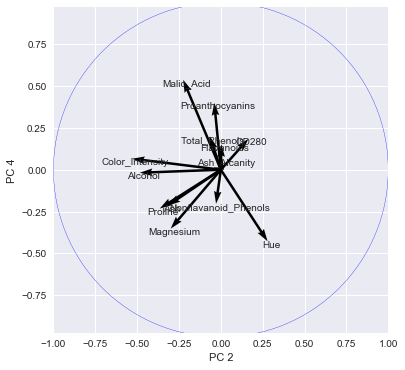

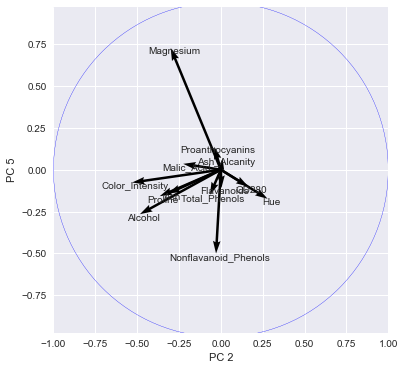

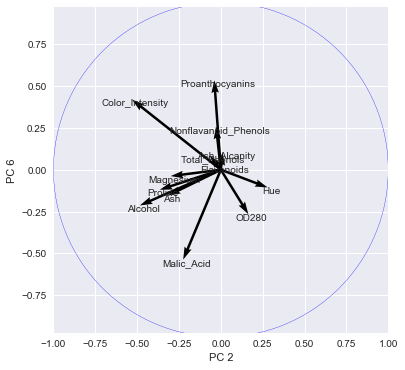

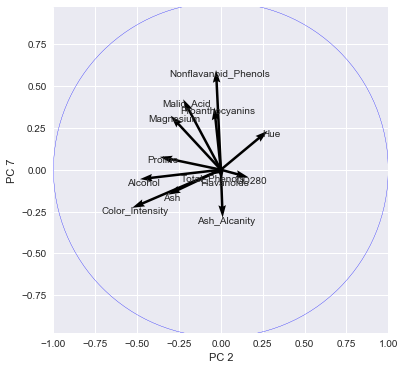

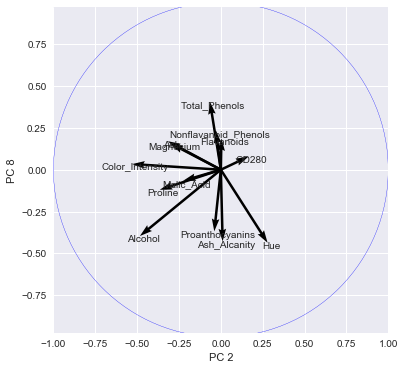

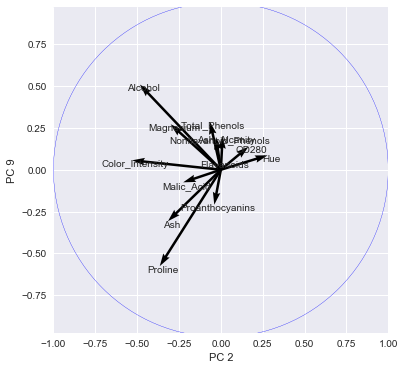

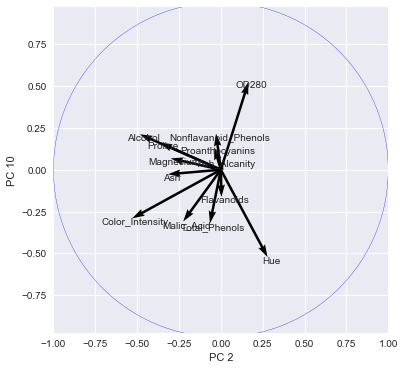

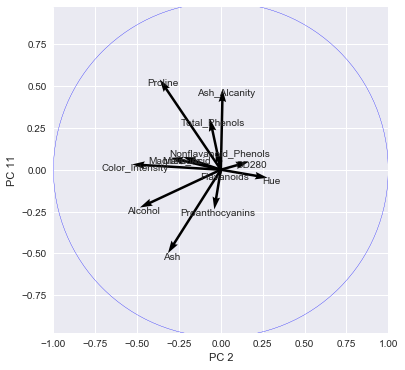

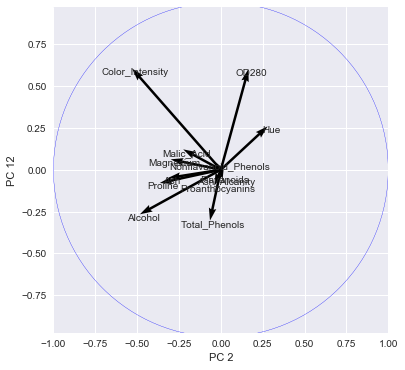

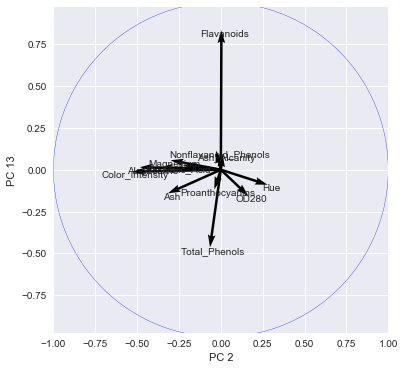

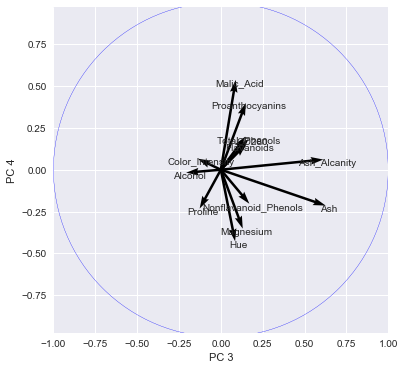

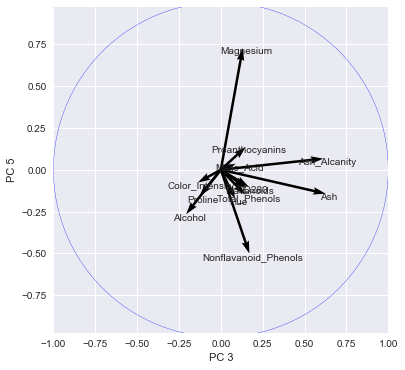

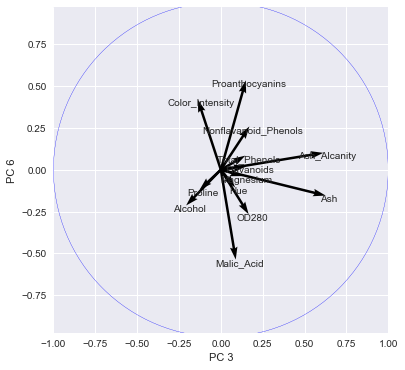

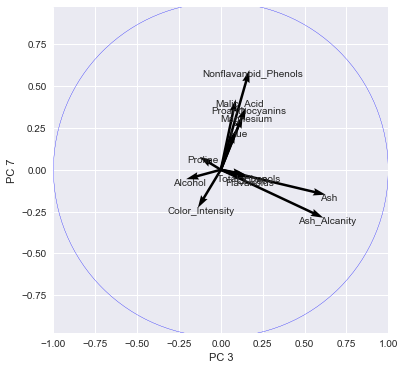

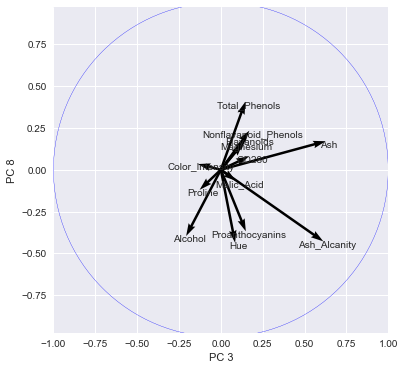

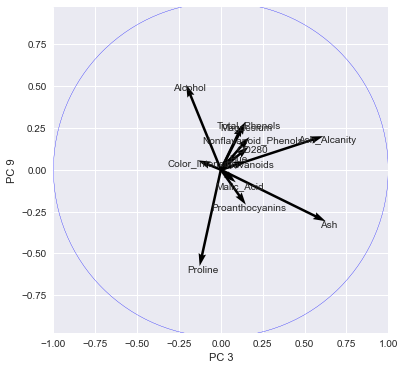

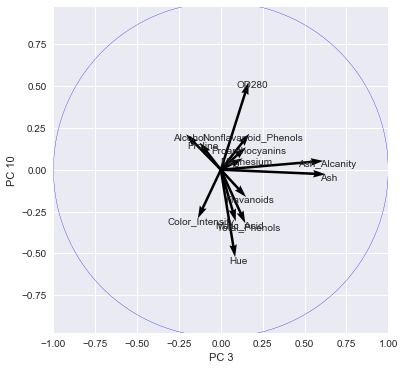

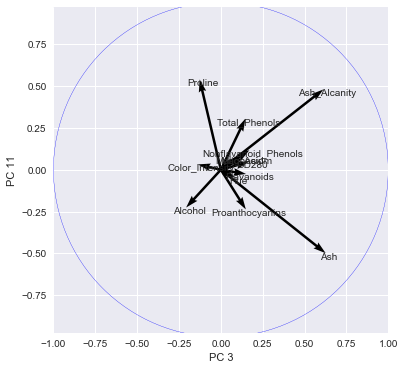

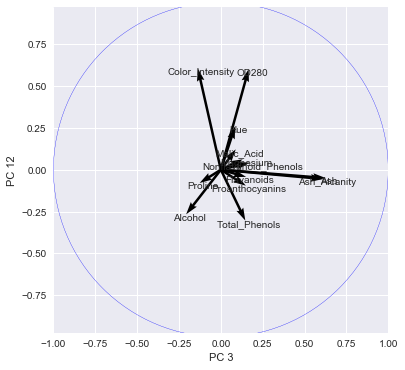

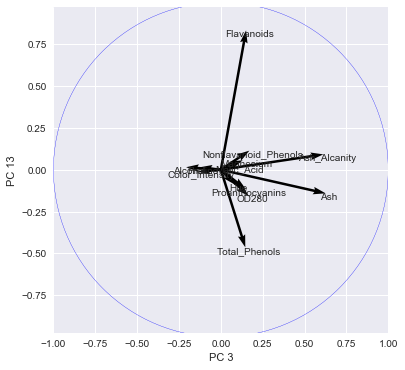

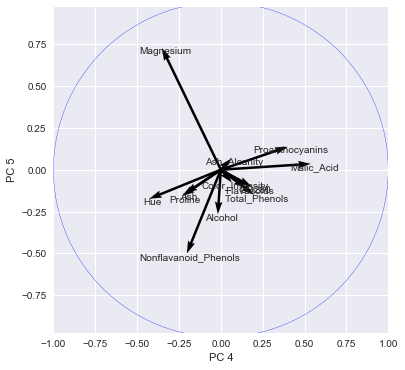

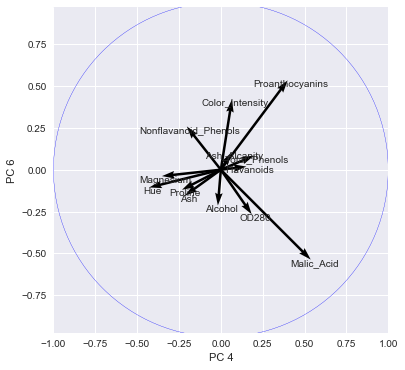

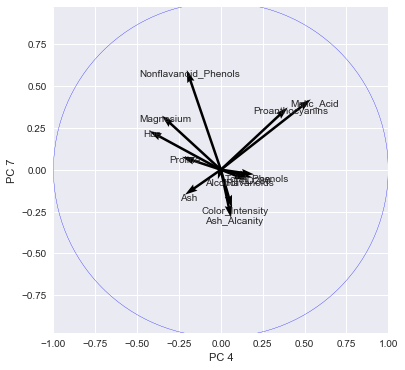

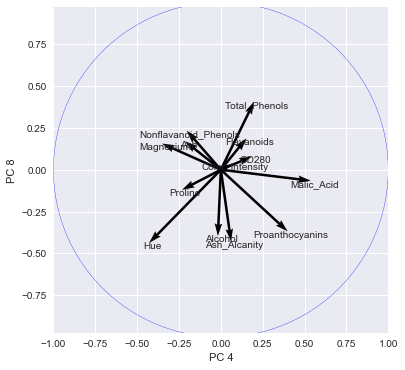

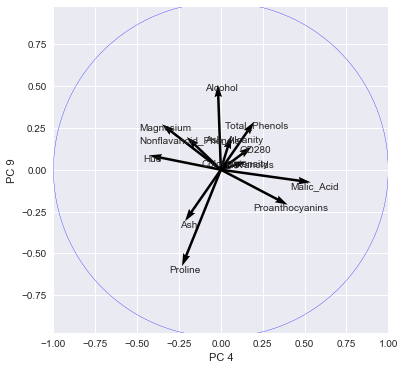

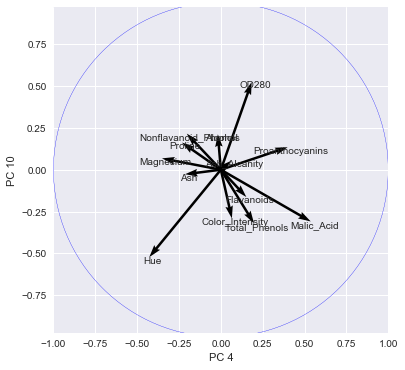

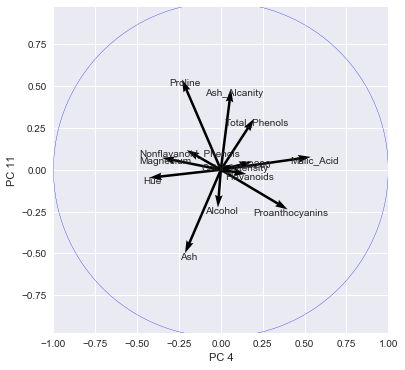

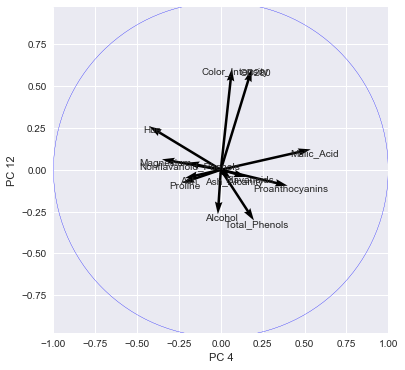

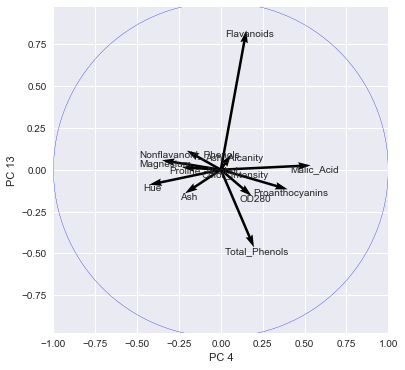

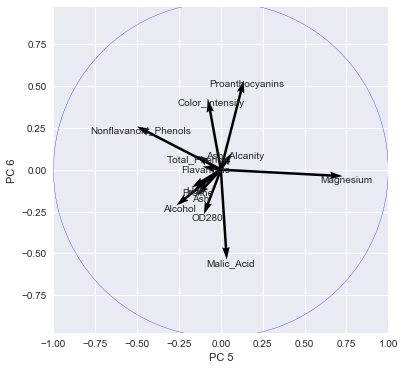

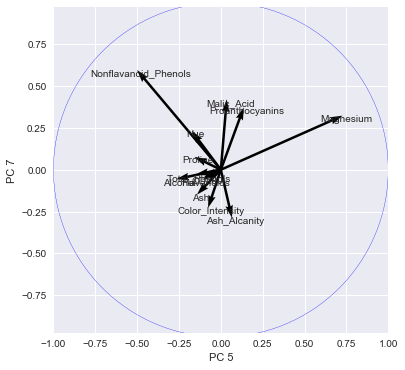

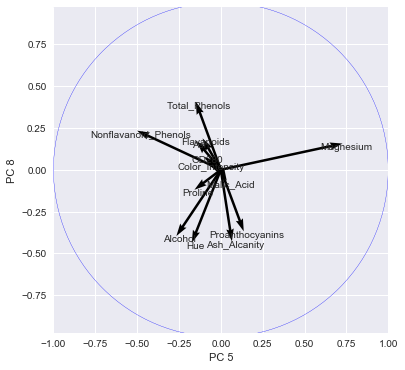

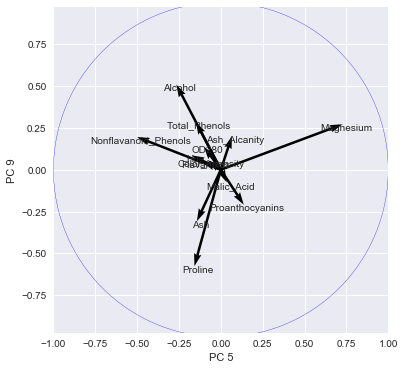

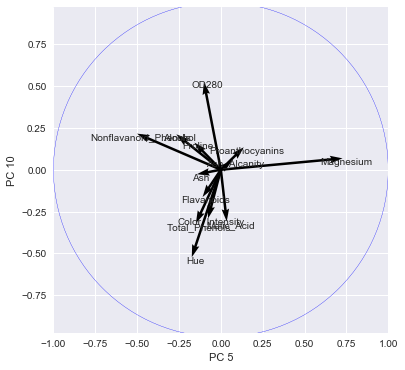

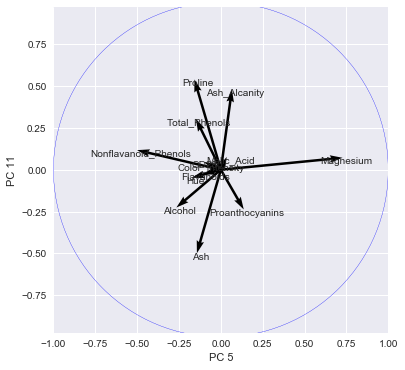

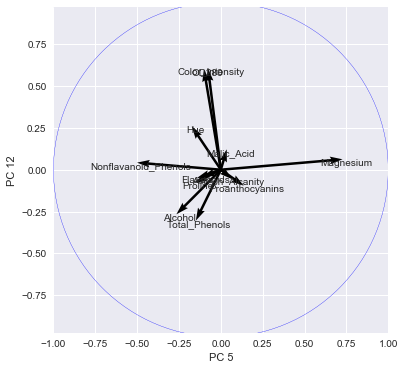

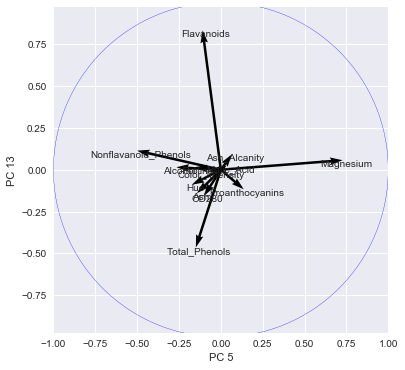

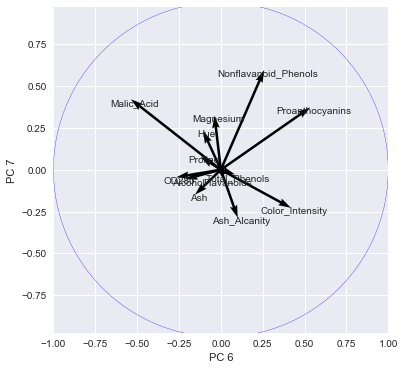

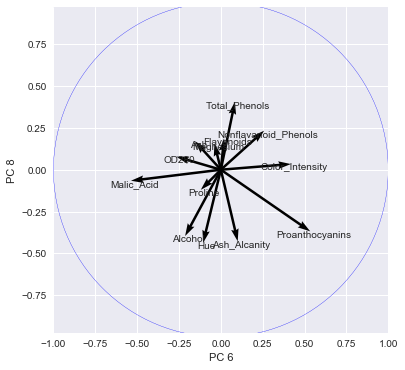

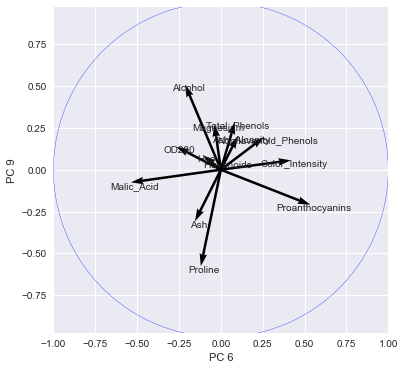

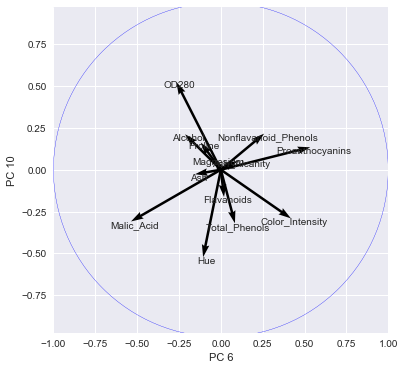

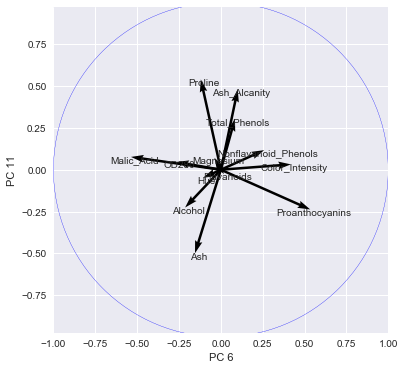

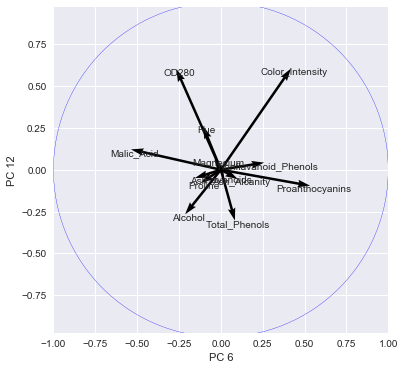

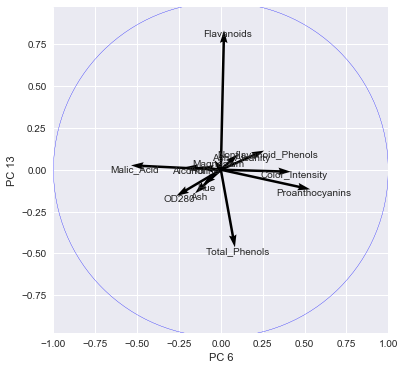

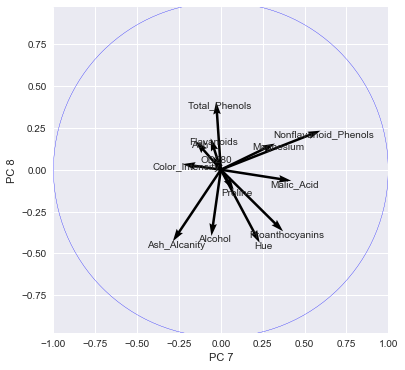

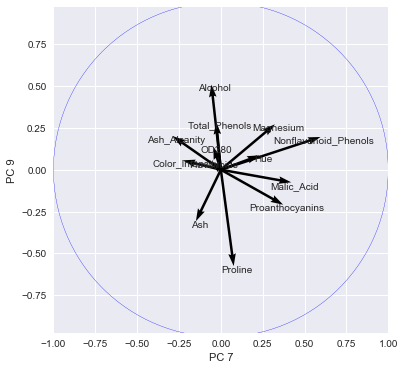

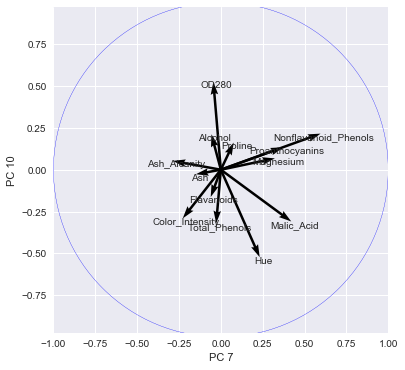

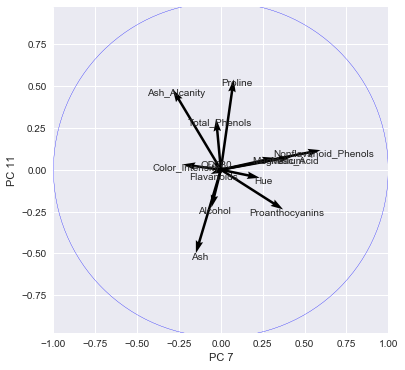

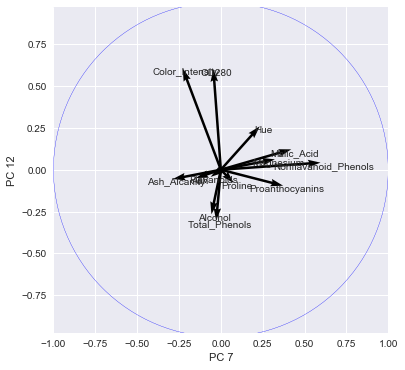

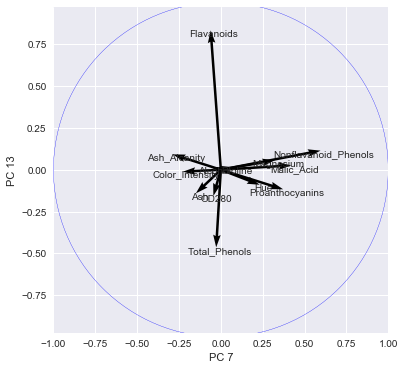

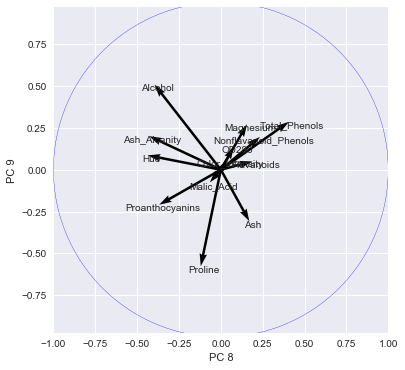

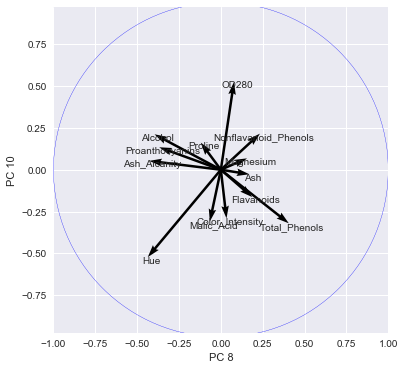

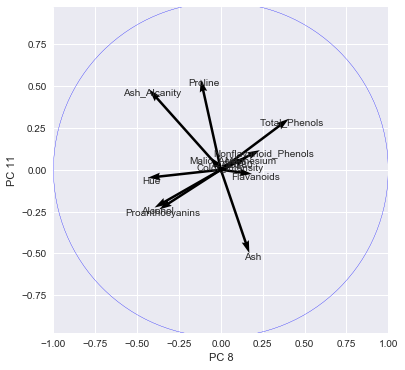

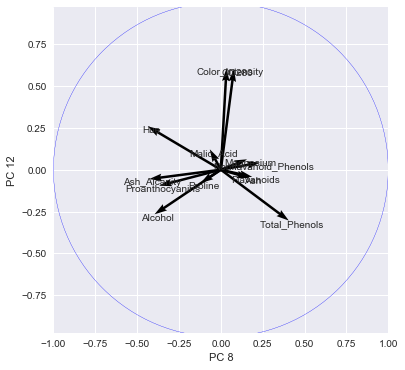

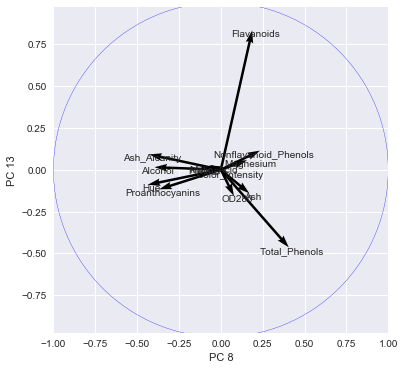

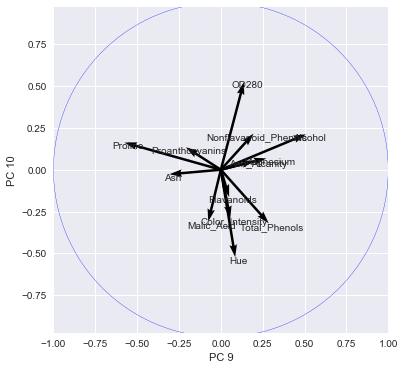

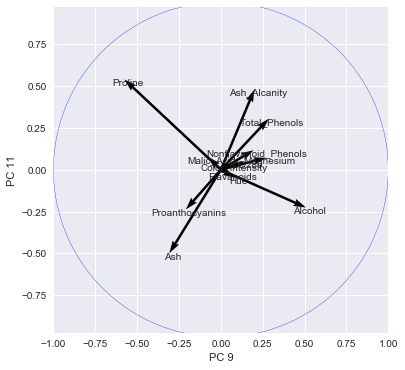

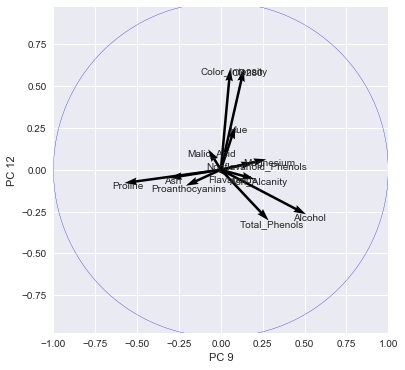

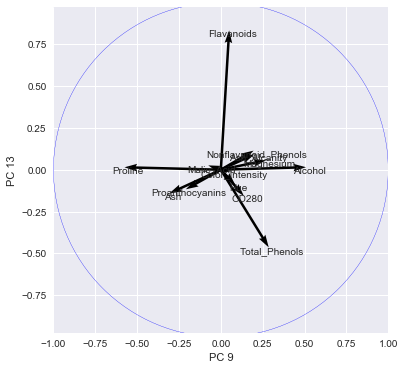

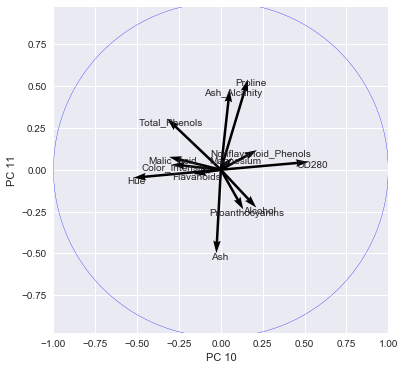

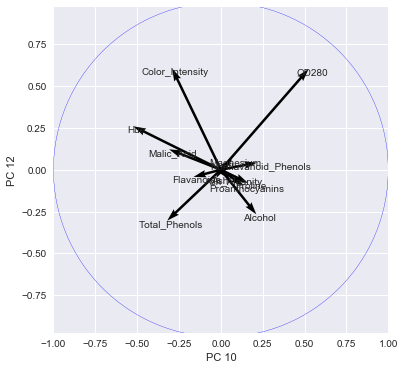

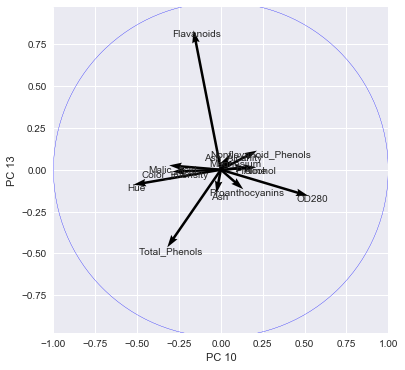

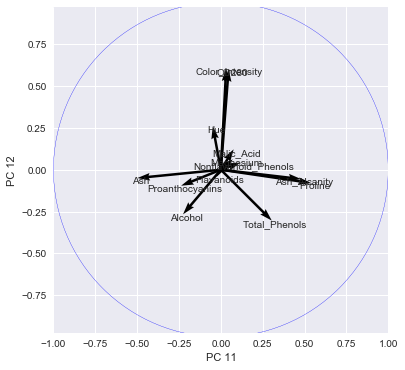

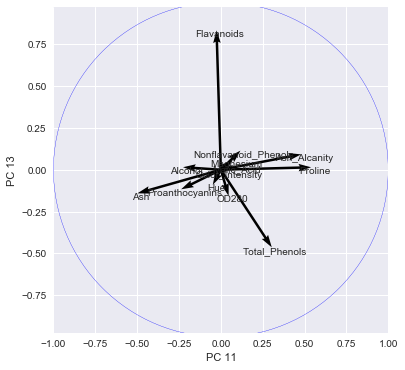

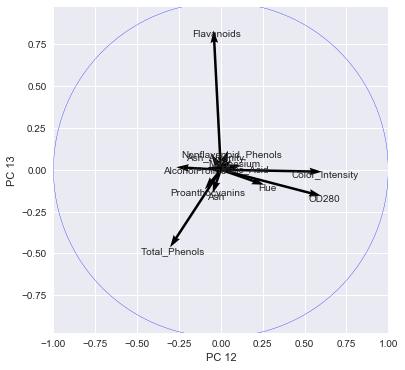

In [62]:
circle_of_correlations(X)